In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [22]:
stations = engine.execute("select * from Station")
print(stations.keys())

RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])


In [23]:
stations = engine.execute("select * from Measurement")
print(stations.keys())

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])


# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ddcf8ee460>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [21]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ddcf71db50>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1}

In [26]:
# found most recent date
# session.query(Dow.date).order_by(Dow.date.desc()).first()
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

In [33]:
# Calculate the date one year from the last date in data set.
year_ago

datetime.date(2016, 8, 23)

In [87]:
# Perform a query to retrieve the data and precipitation scores
# Only need dates above or equal to a year ago as we only have data up to a year after that date
# so we don't have to do a between since we are using only one end of our data
Past_year_prec = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= year_ago).\
                    order_by(Measurement.date).all()
Past_year_prec

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [57]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rainfall_past_year = pd.DataFrame(Past_year_prec, columns=["date","precipitation"])
rainfall_past_year

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [82]:
# Sort the dataframe by date
rainfall_past_year_sort = rainfall_past_year.sort_values("date")
rainfall_past_year_sort

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


In [104]:
rpys_df = rainfall_past_year_sort.set_index('date')
rpys_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [105]:
dfr = rpys_df.groupby("date")["precipitation"].sum()
dfr.head(10)

date
2016-08-23    2.71
2016-08-24    9.33
2016-08-25    0.54
2016-08-26    0.10
2016-08-27    0.32
2016-08-28    3.10
2016-08-29    1.46
2016-08-30    0.07
2016-08-31    3.18
2016-09-01    0.03
Name: precipitation, dtype: float64

In [106]:
rainfall_past_year2 = pd.DataFrame(dfr, columns=["precipitation"])
rainfall_past_year2

,precipitation
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


In [107]:
rainfall_past_year2.reset_index(inplace=True)
rainfall_past_year2

,date,precipitation
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32
...,...,...
361,2017-08-19,0.09
362,2017-08-20,0.01
363,2017-08-21,0.58
364,2017-08-22,0.50


Text(0, 0.5, 'rainfall')

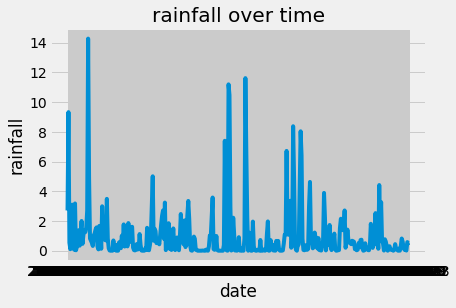

In [122]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(rainfall_past_year2['date'], rainfall_past_year2['precipitation'])
plt.title("rainfall over time")
plt.xlabel("date")
plt.ylabel("rainfall")

Text(0, 0.5, 'rainfall')

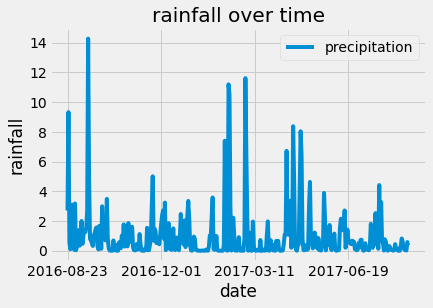

In [123]:
rainfall_past_year2.plot(x='date', y='precipitation', use_index=True)
plt.title("rainfall over time")
plt.xlabel("date")
plt.ylabel("rainfall")

In [124]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rainfall_past_year2.describe()

,precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [138]:
stations = engine.execute("select * from Measurement")
print(stations.keys())

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])


In [142]:
# Design a query to calculate the total number stations in the dataset
Number_of_stations = session.query(Station).count()
print(Number_of_stations)

9


In [144]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations.query.count()

AttributeError: 'LegacyCursorResult' object has no attribute 'query'

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()